# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.115235e+01     7.859909e+00
 * time: 0.0014848709106445312
     1     2.912509e+01     5.805444e+00
 * time: 0.006273984909057617
     2     2.127355e+01     6.034658e+00
 * time: 0.010593891143798828
     3     1.711182e+01     5.787314e+00
 * time: 0.014453887939453125
     4     1.135539e+01     2.354340e+00
 * time: 0.0555419921875
     5     1.127418e+01     4.167029e+00
 * time: 0.058447837829589844
     6     1.015168e+01     2.070992e+00
 * time: 0.061409950256347656
     7     9.553774e+00     2.070850e+00
 * time: 0.06458091735839844
     8     9.123887e+00     2.158410e+00
 * time: 0.06718802452087402
     9     8.726056e+00     1.656200e+00
 * time: 0.07018899917602539
    10     8.459024e+00     1.050226e+00
 * time: 0.07347583770751953
    11     8.242449e+00     8.168804e-01
 * time: 0.07688784599304199
    12     8.215418e+00     9.325392e-01
 * time: 0.07909798622131348
    13     8.162090e+00     5.435832e-01
 * ti

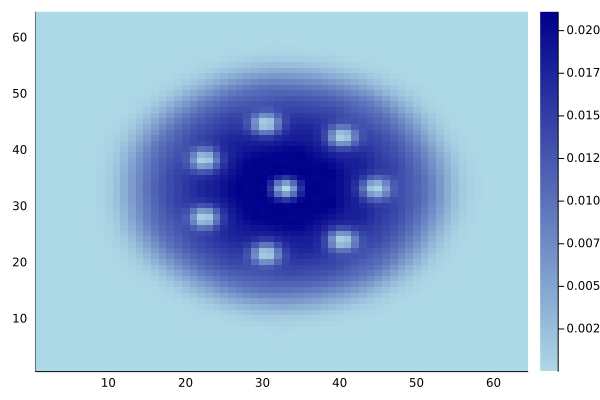

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)